# Модуль 3. Нейронные Сети


## Inception V3


1/1 [==============================] - 1s 1s/step
Предсказанный объект:
peacock
С вероятностью:
96.19%


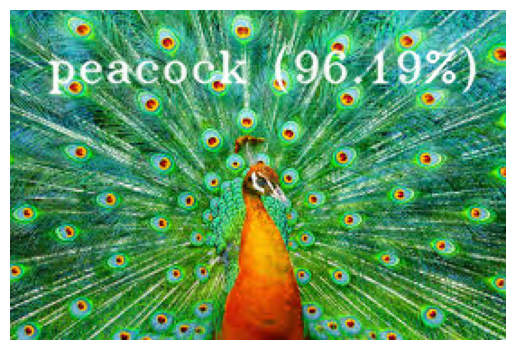

In [13]:
from keras.applications import InceptionV3
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Загружаем изображение для предсказания
img_path = "./data/peacock.jpeg"
img = load_img(img_path)

# Изменяем размер изображения до 299x299 пикселей (размер, требуемый для InceptionV3)
img = img.resize((299, 299))

# Преобразуем изображение в массив
img_array = img_to_array(img)

# Преобразуем изображение в 4-мерный тензор (размеры: (batch_size, height, width, channels))
img_array = np.expand_dims(img_array, axis=0)

# Предобрабатываем входное изображение
img_array = preprocess_input(img_array)

# Загружаем предобученную модель InceptionV3 с весами ImageNet
pretrained_model = InceptionV3(weights="imagenet")

# Выполняем предсказание с помощью метода predict()
prediction = pretrained_model.predict(img_array)

# Декодируем предсказания
actual_prediction = imagenet_utils.decode_predictions(prediction)

# Выводим предсказанный объект и вероятность
print("Предсказанный объект:")
print(actual_prediction[0][0][1])
print("С вероятностью:")
print(f"{actual_prediction[0][0][2]*100:.2f}%")

# Загружаем изображение для отображения
disp_img = cv2.imread(img_path)

# Отображаем текст предсказания на изображении
cv2.putText(disp_img, f"{actual_prediction[0][0][1]} ({actual_prediction[0][0][2]*100:.2f}%)", (20, 40), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255, 255, 255), 1, cv2.LINE_AA)

# Показываем изображение с предсказанием
plt.imshow(disp_img)
plt.axis("off")
plt.show()